**Problem Statement**

To predict the future prices of used phone(second Hands phones brand) based on the Independent variable,
from the factors/features that significantly helps in determine the prices.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

#imported all the neceesary Libraries

**Getting The path directory of my system**

In [2]:
pwd

'C:\\Users\\HP'

In [3]:
#let get our data in here

df=pd.read_csv(r'C:\\Users\\HP\Downloads\used_device_data.csv')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

From The stand point We see that our non-null value count so not match

this is telling us that we have missing value✔

In this dataset, we can also observe the data's form, 
which indicates that there are currently 3454 rows and 14 columns worth of data.

**let move to columns Description**

device_brand: Name of manufacturing brand

os: OS on which the device runs

screen_size: Size of the screen in cm

4g: Whether 4G is available or not

5g: Whether 5G is available or not

front_camera_mp: Resolution of the rear camera in megapixels

back_camera_mp: Resolution of the front camera in megapixels

internal_memory: Amount of internal memory (ROM) in GB

ram: Amount of RAM in GB

battery: Energy capacity of the device battery in mAh

weight: Weight of the device in grams

release_year: Year when the device model was released

days_used: Number of days the used/refurbished device has been used

normalized_new_price: Normalized price of a new device of the same model

normalized_used_price (TARGET): Normalized price of the used/refurbished device

(-1.25, 1.25, -1.25, 1.25)

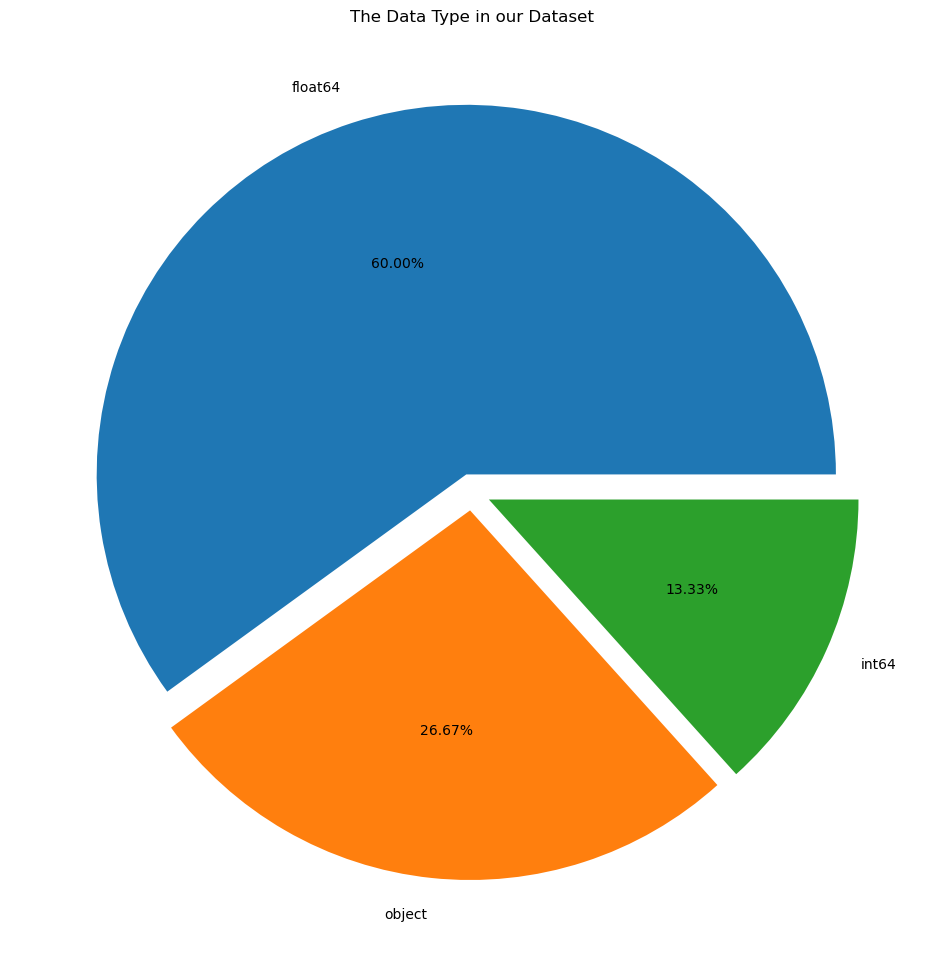

In [4]:
df.dtypes.value_counts().plot.pie(figsize=(12,12),explode=[0.05,0.05,0.05],autopct='%1.2f%%')
plt.title('The Data Type in our Dataset')
plt.axis('off')

In [5]:
#let view our dataset

df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [6]:
for i in df.columns:
    print('The Uniqueness of our value in Our Data{}:{}'.format(i,df[i].nunique()))

The Uniqueness of our value in Our Datadevice_brand:34
The Uniqueness of our value in Our Dataos:4
The Uniqueness of our value in Our Datascreen_size:142
The Uniqueness of our value in Our Data4g:2
The Uniqueness of our value in Our Data5g:2
The Uniqueness of our value in Our Datarear_camera_mp:41
The Uniqueness of our value in Our Datafront_camera_mp:37
The Uniqueness of our value in Our Datainternal_memory:15
The Uniqueness of our value in Our Dataram:12
The Uniqueness of our value in Our Databattery:324
The Uniqueness of our value in Our Dataweight:555
The Uniqueness of our value in Our Datarelease_year:8
The Uniqueness of our value in Our Datadays_used:924
The Uniqueness of our value in Our Datanormalized_used_price:3094
The Uniqueness of our value in Our Datanormalized_new_price:2988


**let check for Data validation and sanity**

In [7]:
#checking for missing Data

df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


rear_camera_mp  columns is the Most Columns that has missing Values is better we drop the column

In [9]:
#we dropping the rear_camera_mp columns 


df=df.drop('rear_camera_mp',axis=1)

#and also we dropping very other missing values

df=df.dropna()

In [10]:
#now let verify

df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**EXplanatory Analaysis**

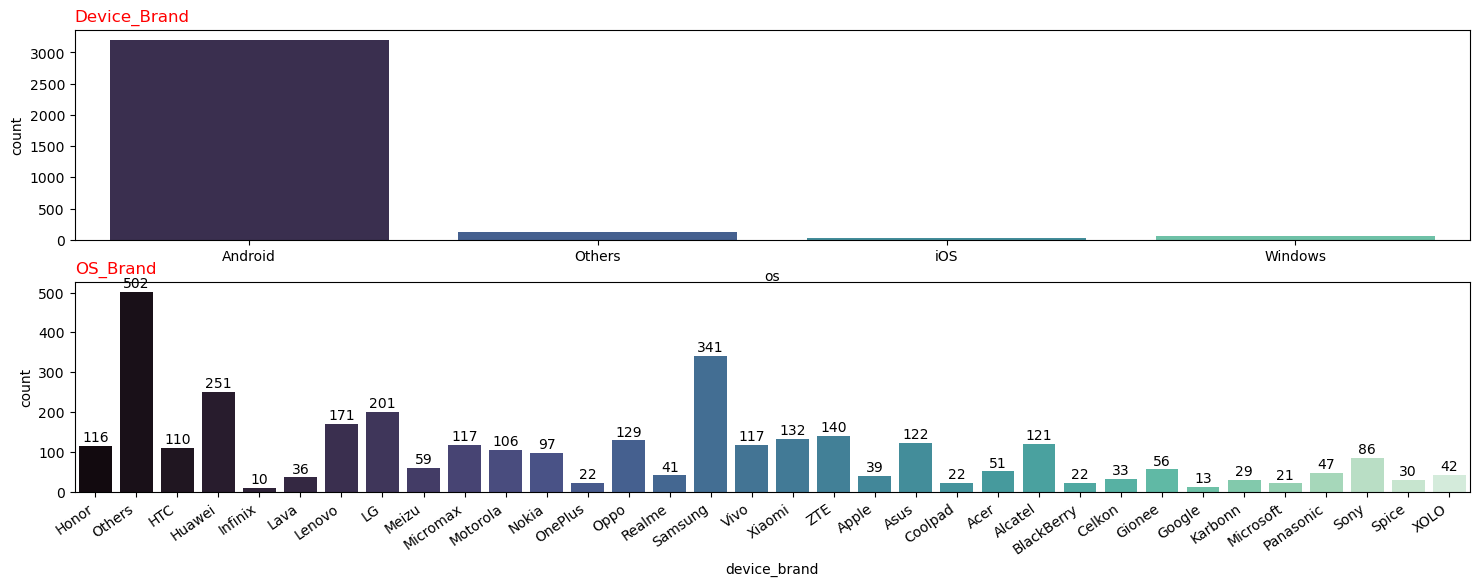

In [11]:
#plotting to See the commmon Device brand and the common os brand

fig,ax=plt.subplots(2,1,figsize=(18,6))
fig=sns.countplot(data=df,x='os',palette='mako',ax=ax[0])
ax[0].set_title('Device_Brand',c='r',loc='left')
fig=sns.countplot(data=df,x='device_brand',palette='mako',ax=ax[1])
ax[1].set_title('OS_Brand',c='r',loc='left')
plt.xticks(rotation=35,ha='right')


for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)

Insight:

From the visualization;

Andriod is the Most Common Brand of Phone in The Market.

Out of the Andriod Devices brand Samung is the most famous brand.

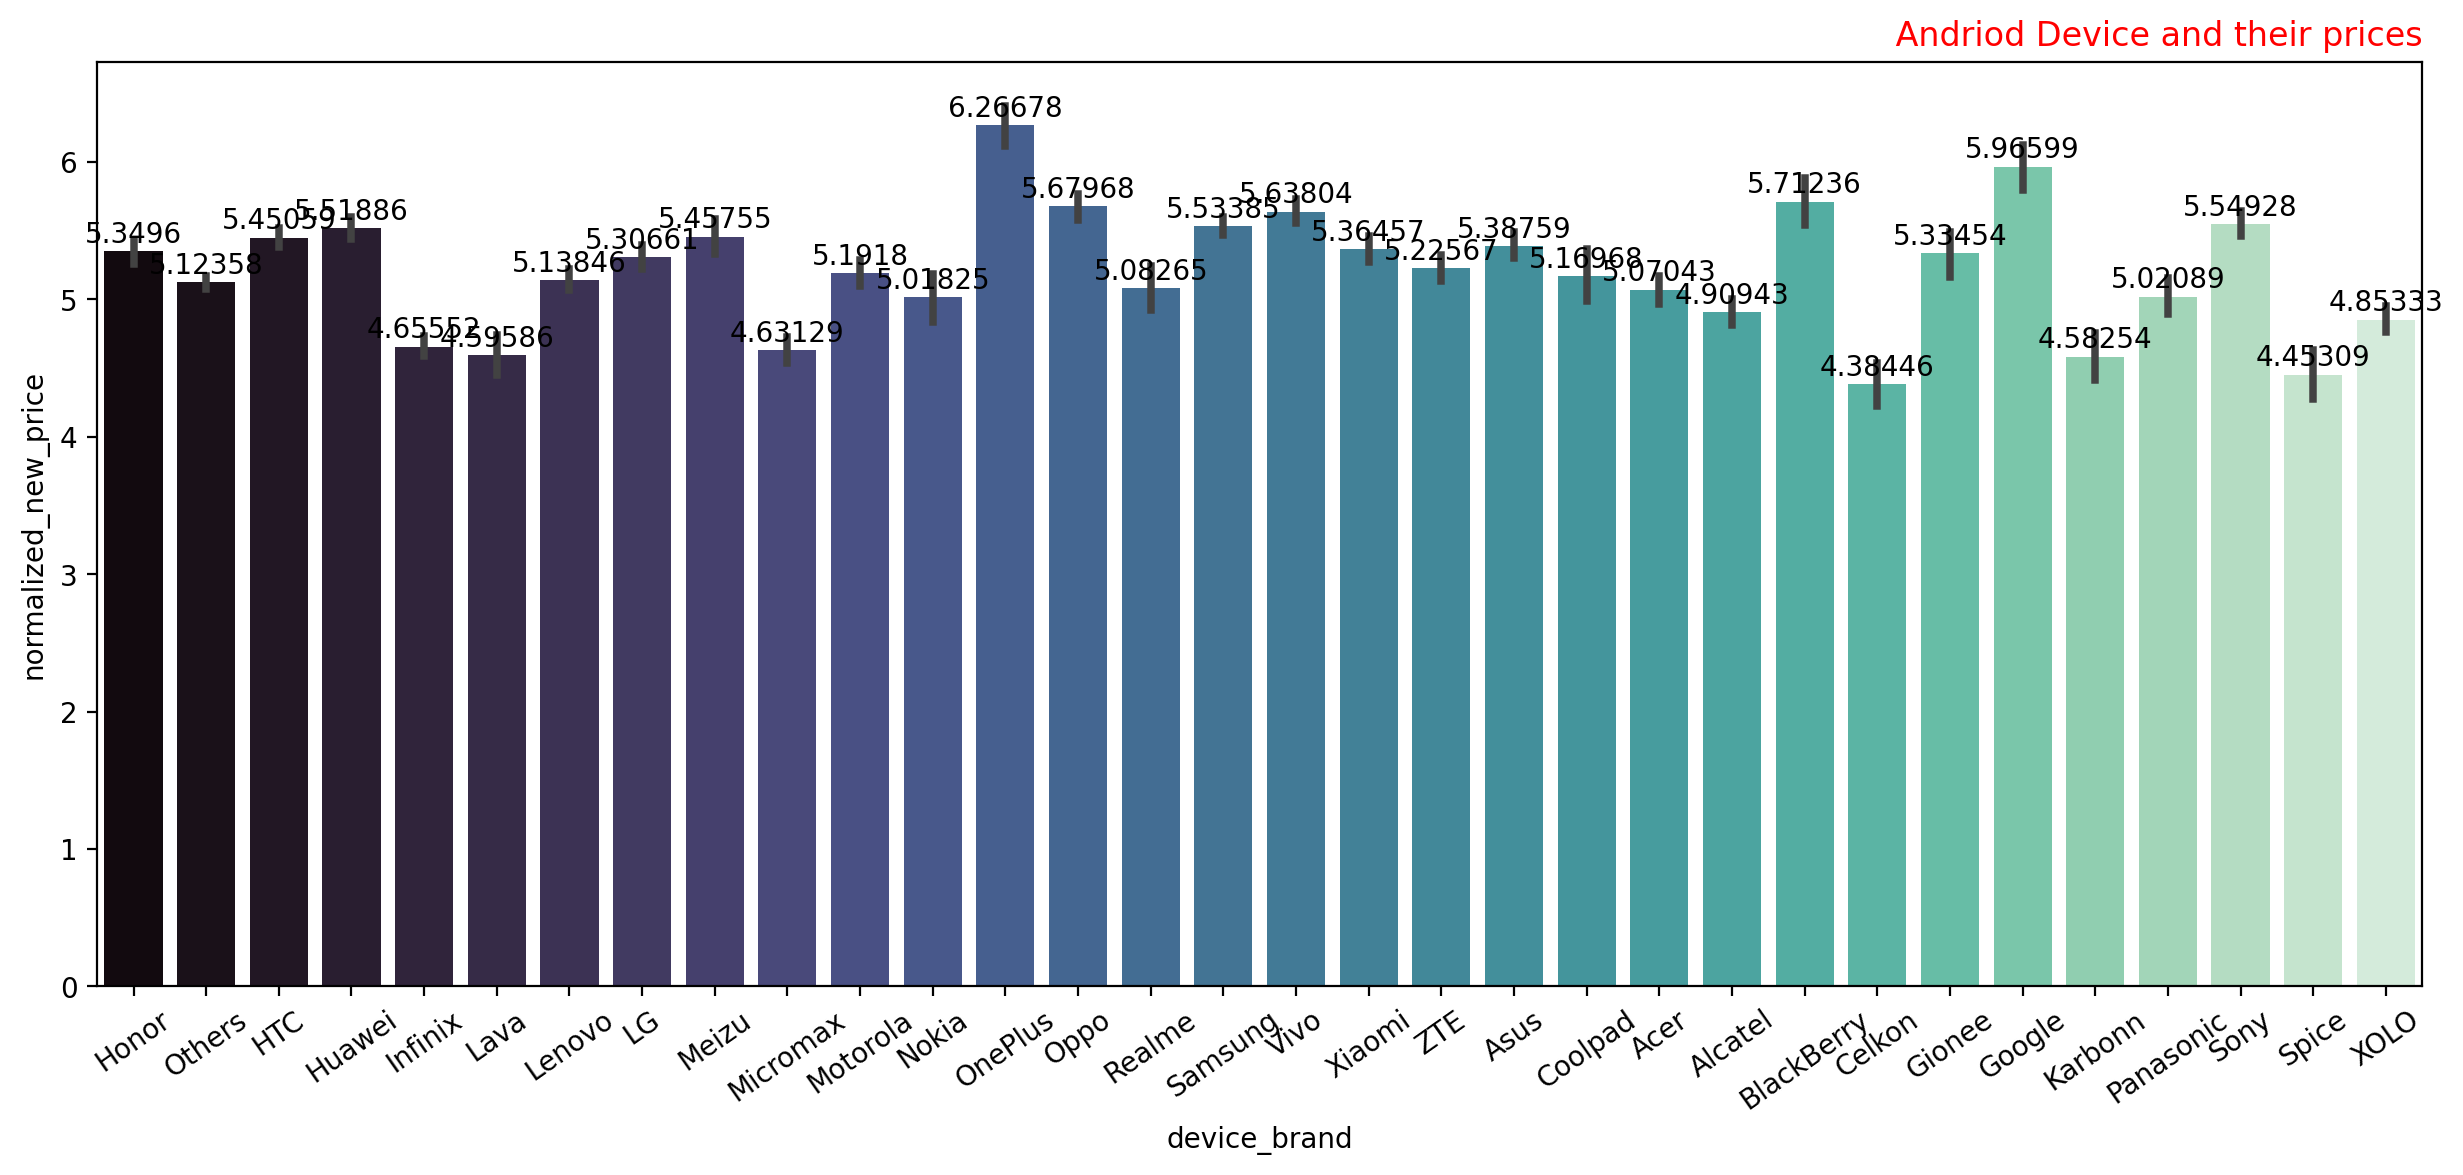

In [12]:
#having know that Andriod is the most common brand in The market 
#let Check for the type of brand that has High cost and Low Cost

plt.figure(figsize=(15,6),dpi=200)
fig=sns.barplot(data=df[df['os']=='Android'],x='device_brand',y='normalized_new_price',palette='mako')
plt.title(' Andriod Device and their prices',loc='right',c='r')
plt.xticks(rotation=35)

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)

In All Andriod Phone the mOst expensive andriod phones are **Oneplus Andriod Phones**.

follow By **Google phones**, 

lastly **Blackberry Andriod Phones**

**what make the Phones more costly than the Others????**

In [13]:
#so here, we focusing our attention to Andriod phones alone

devices_brand=df[df['os']=='Android']

devices_brand.sample()

,device_brand,os,screen_size,4g,5g,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1994,Motorola,Android,12.83,yes,no,5.0,32.0,4.0,2600.0,136.0,2016,694,4.592186,5.398389


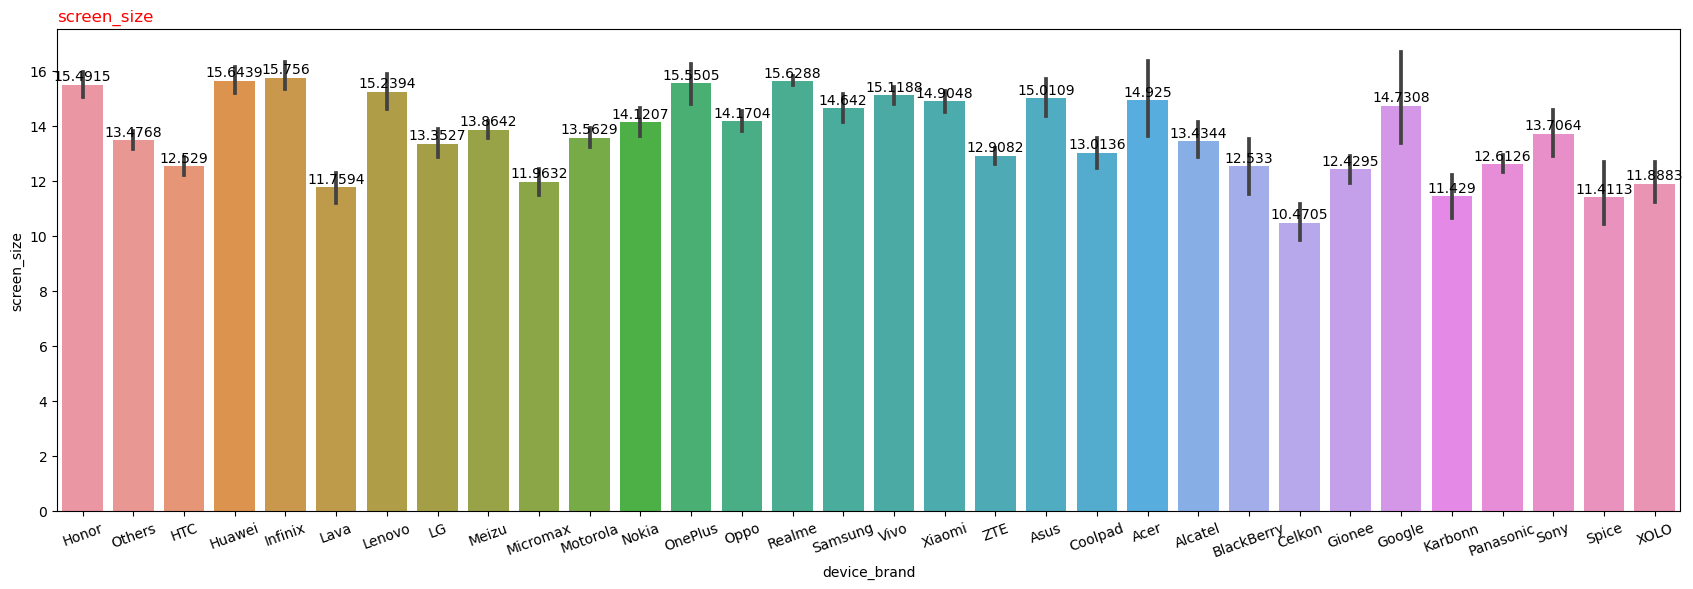

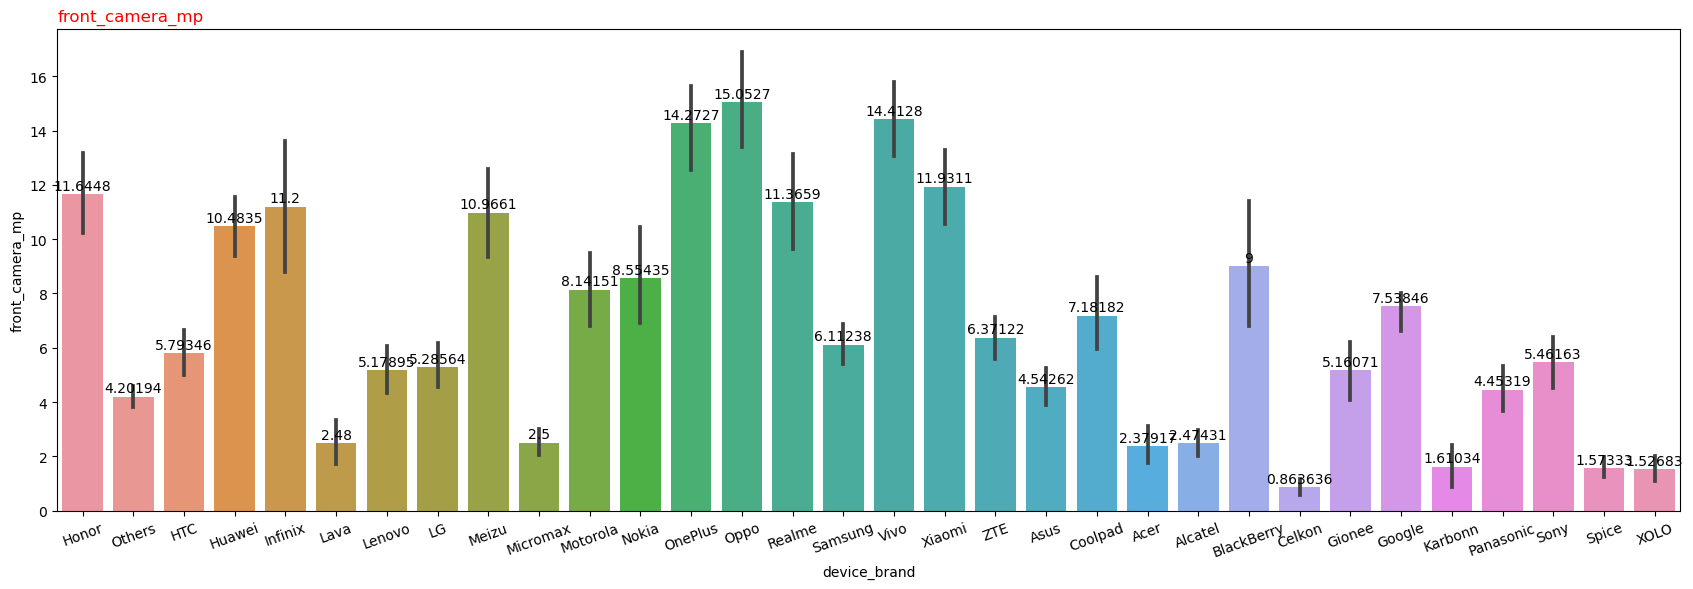

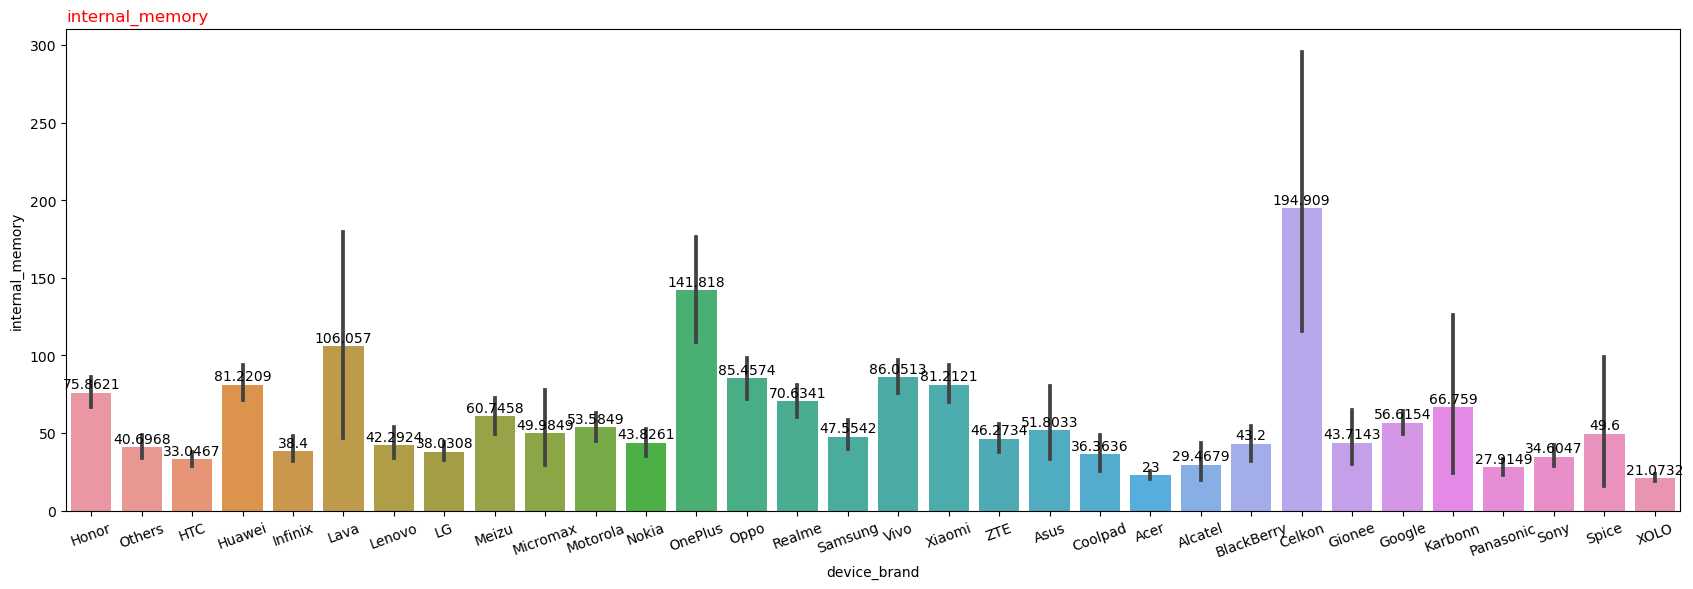

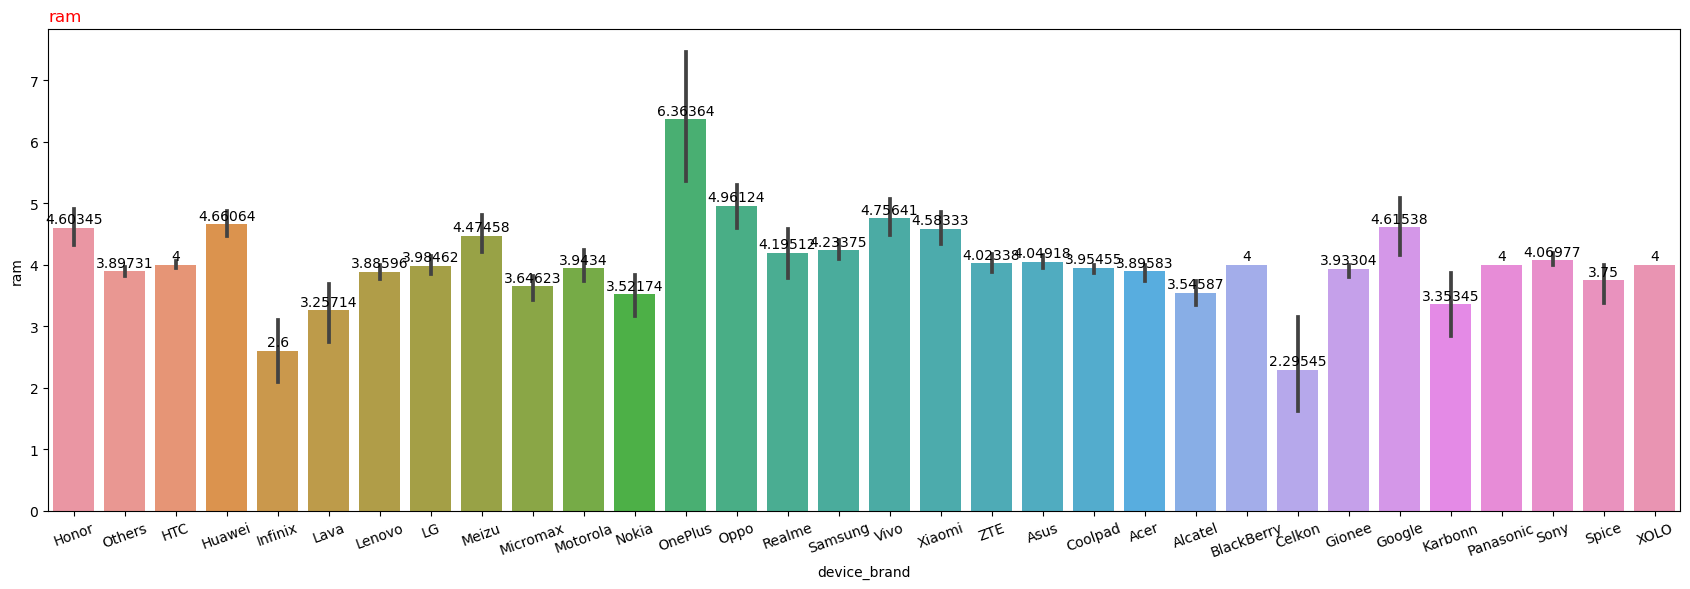

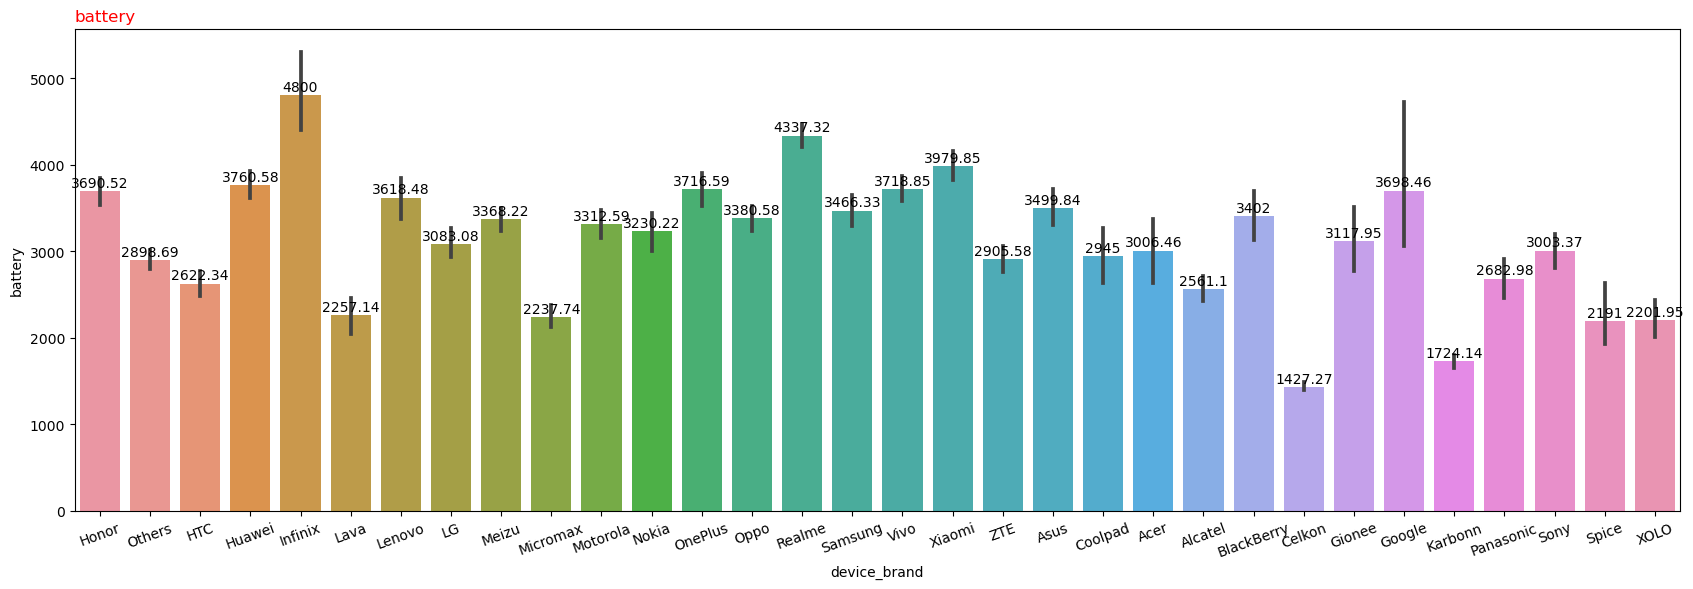

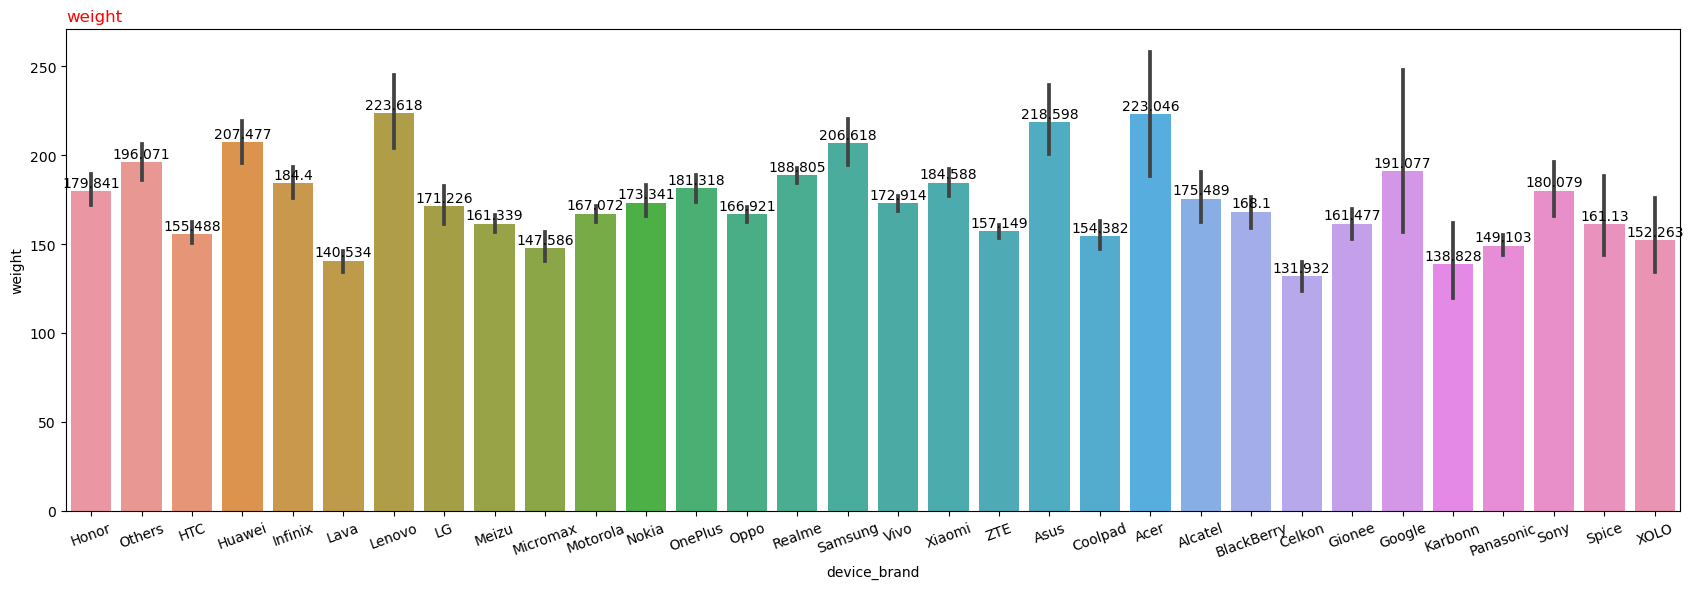

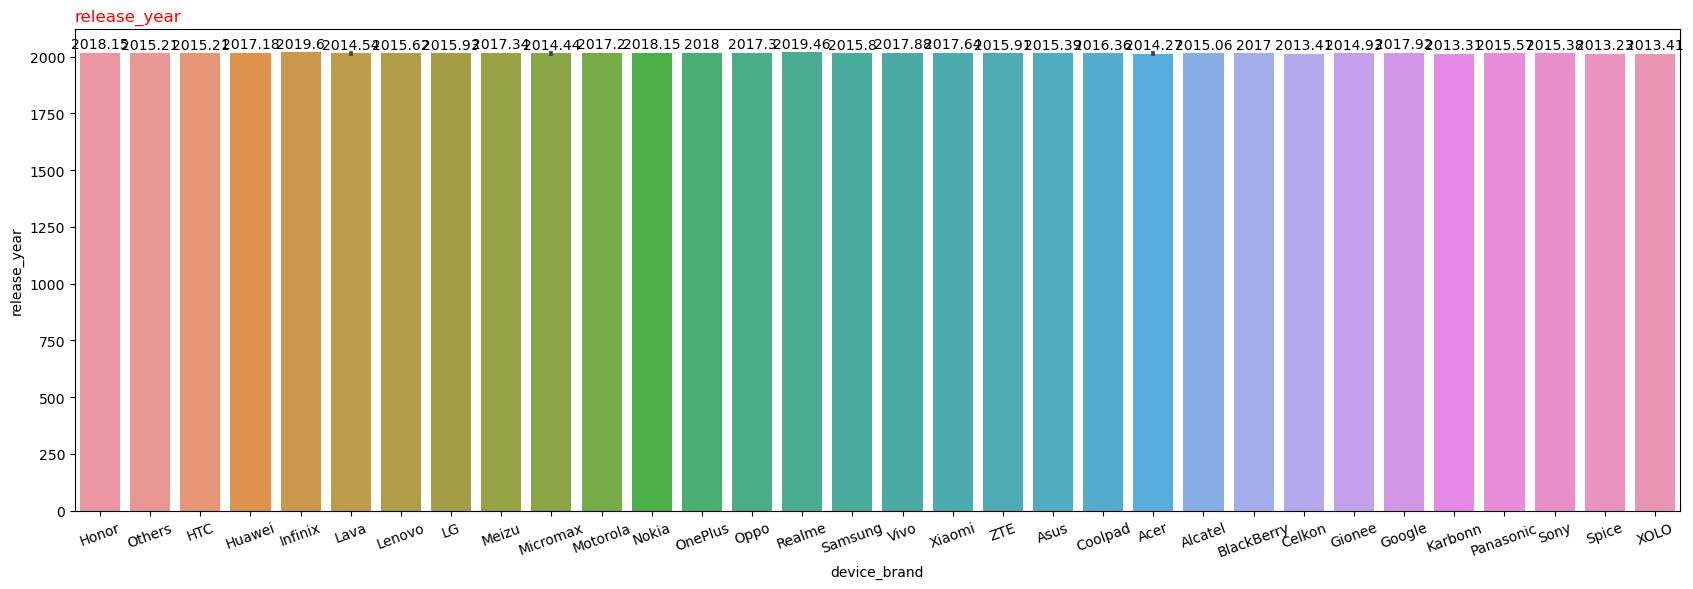

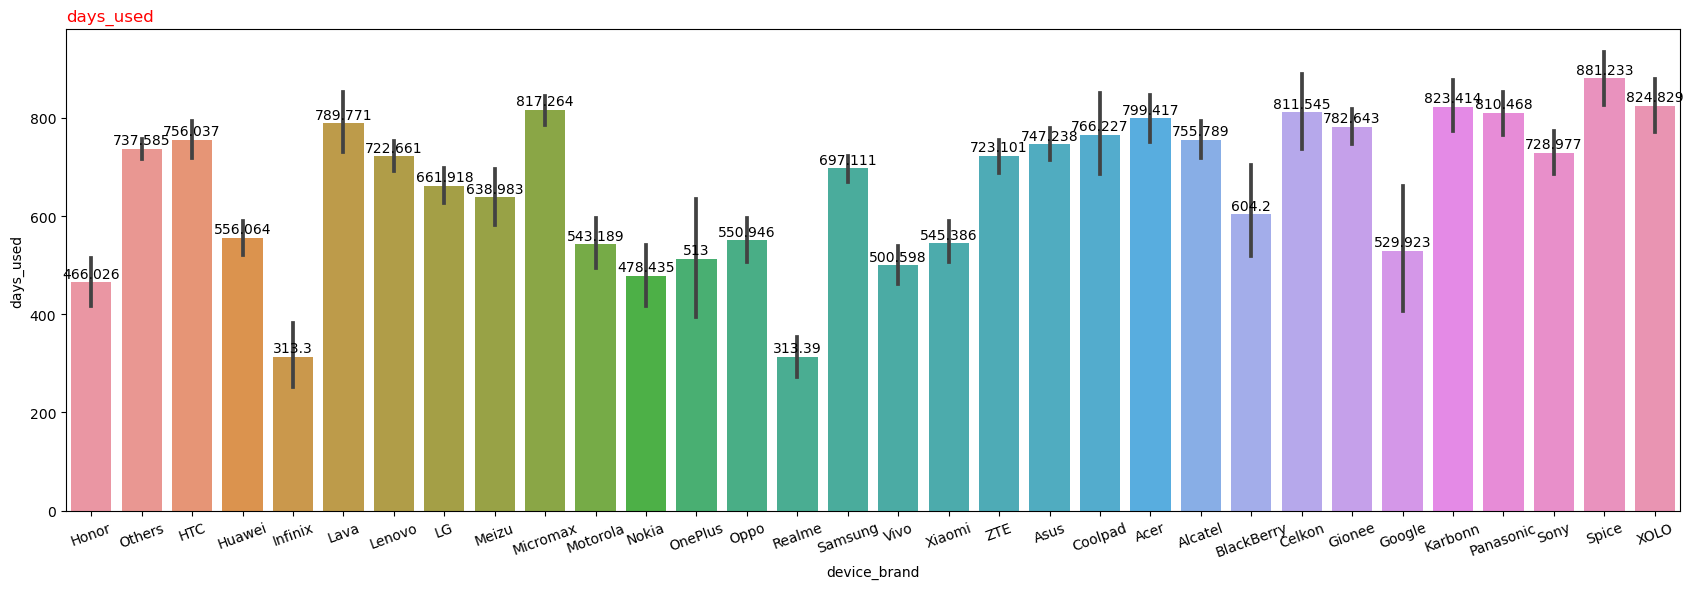

In [14]:
#plotting out for the Nadriod features they attribute

for i,col in enumerate(devices_brand.drop(['device_brand','os','normalized_used_price','4g','5g','normalized_new_price'],axis=1)):
    plt.figure(figsize=(17,6),dpi=100)
    fig=sns.barplot(data=devices_brand,x='device_brand',y=col)
    plt.tight_layout(pad=2)
    plt.title(col,c='r',loc='left')
    plt.xticks(rotation=20)
    plt.tight_layout()
    
    for container in fig.containers:
        fig.bar_label(container,label_type='edge',padding=1)

**insight:**
    
    in this Modern words, where most of the data or where more data generated from the internet re big data and they required 
    
    memory to save them  and to run them, and it happen that Oneplus phone have the most(big) ram out the most andriod phones.
    
    Including in the internal memory oneplus Andriod phone take the second position of the most phone with solid memory.
    
    this two attribute is justify enough to known that oneplus will be one of the top phone with hugh price in 
    the market and which is topping the chat of the andriod Price.

Text(0.0, 1.0, 'The Price of Devices')

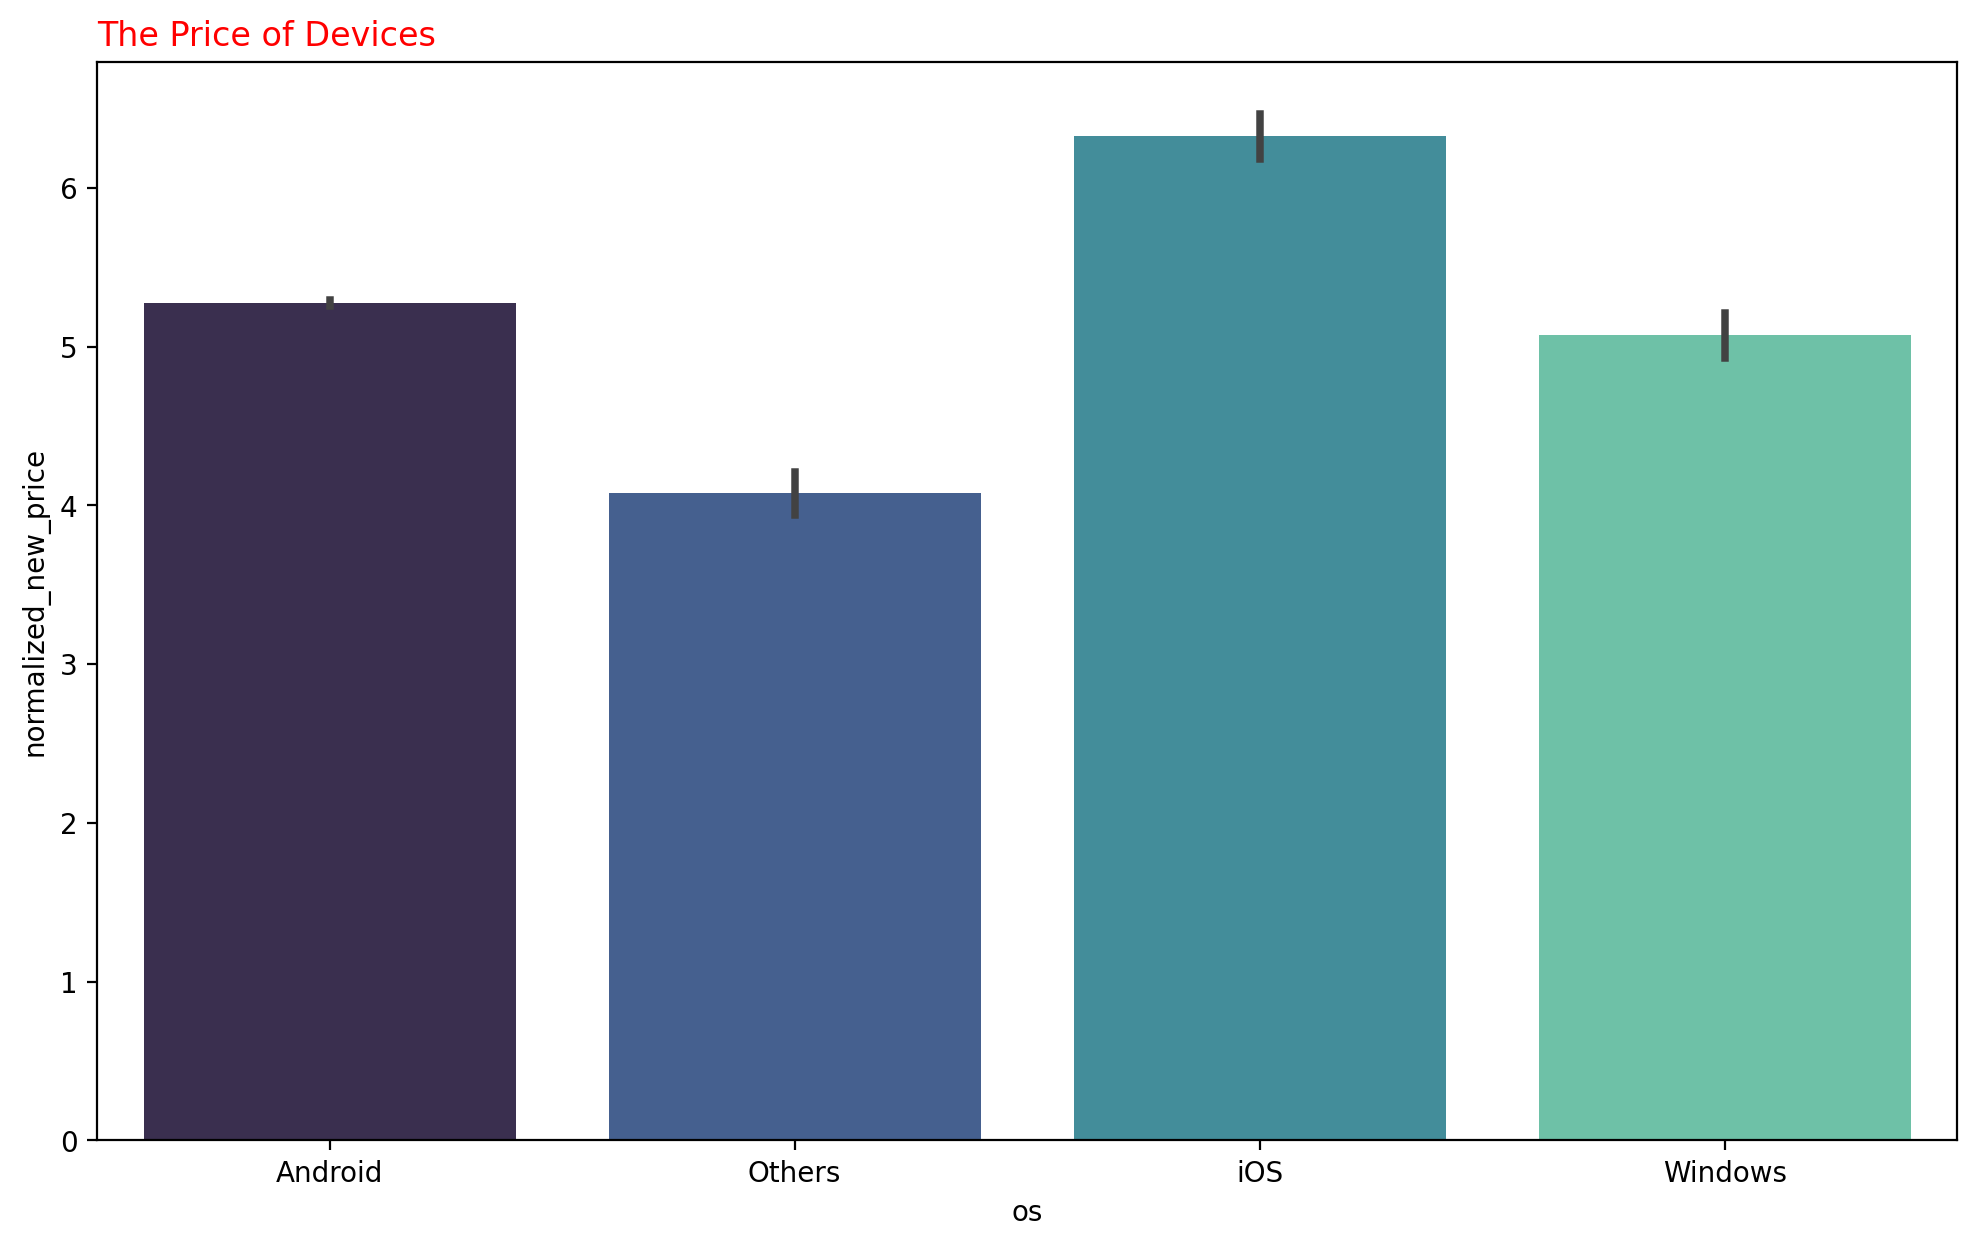

In [15]:
#which Devices phone is most valueable in the market?

plt.figure(figsize=(12,7),dpi=200)
sns.barplot(data=df,x='os',y='normalized_new_price',palette='mako')
plt.title('The Price of Devices',loc='left',c='r')

IOS devices are the most expensive products on the market and are exclusively known to be utilized with Apple devices.

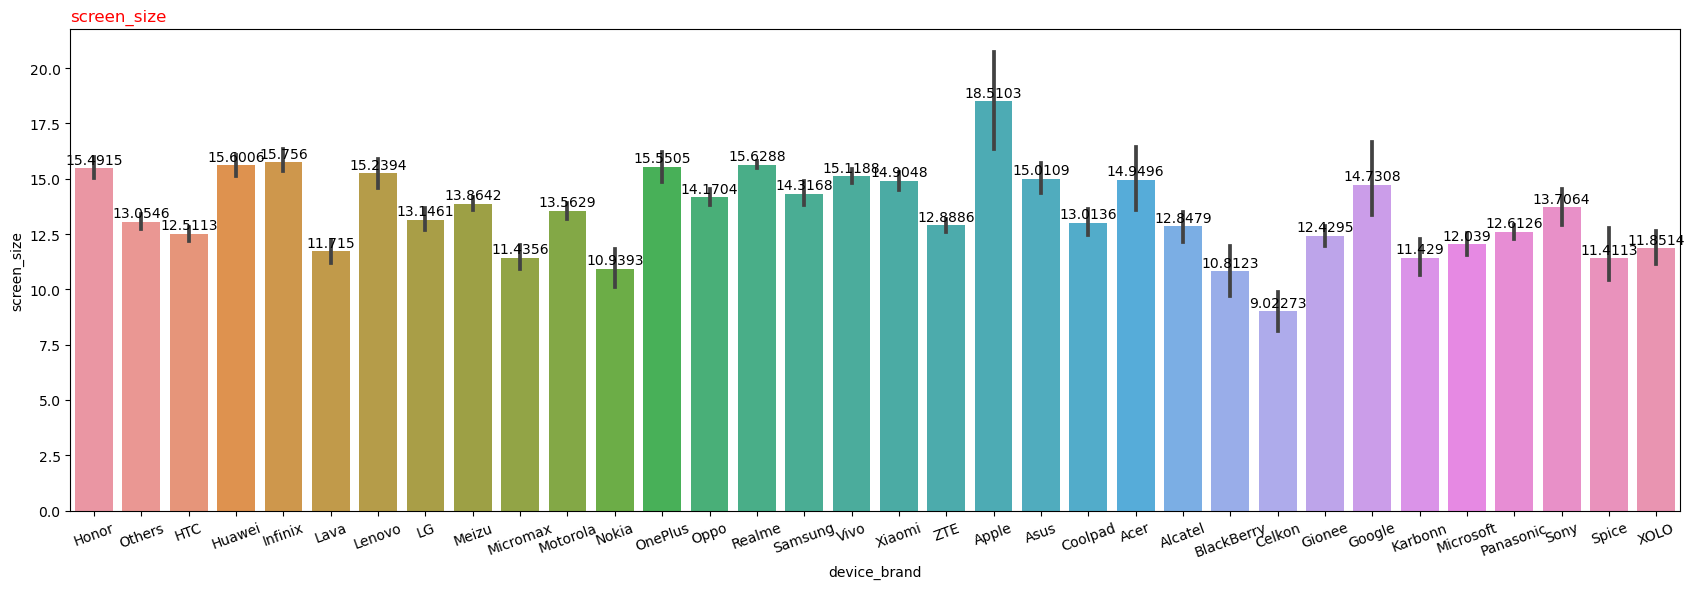

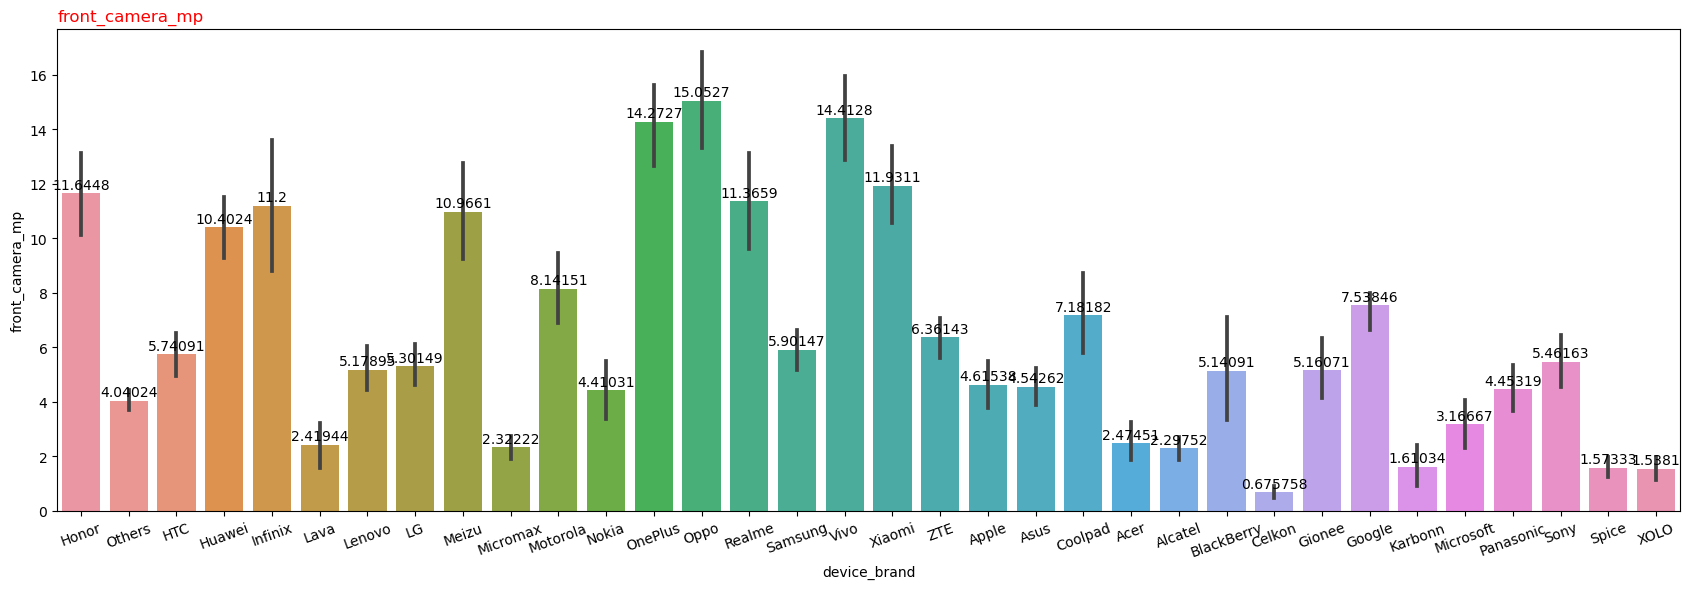

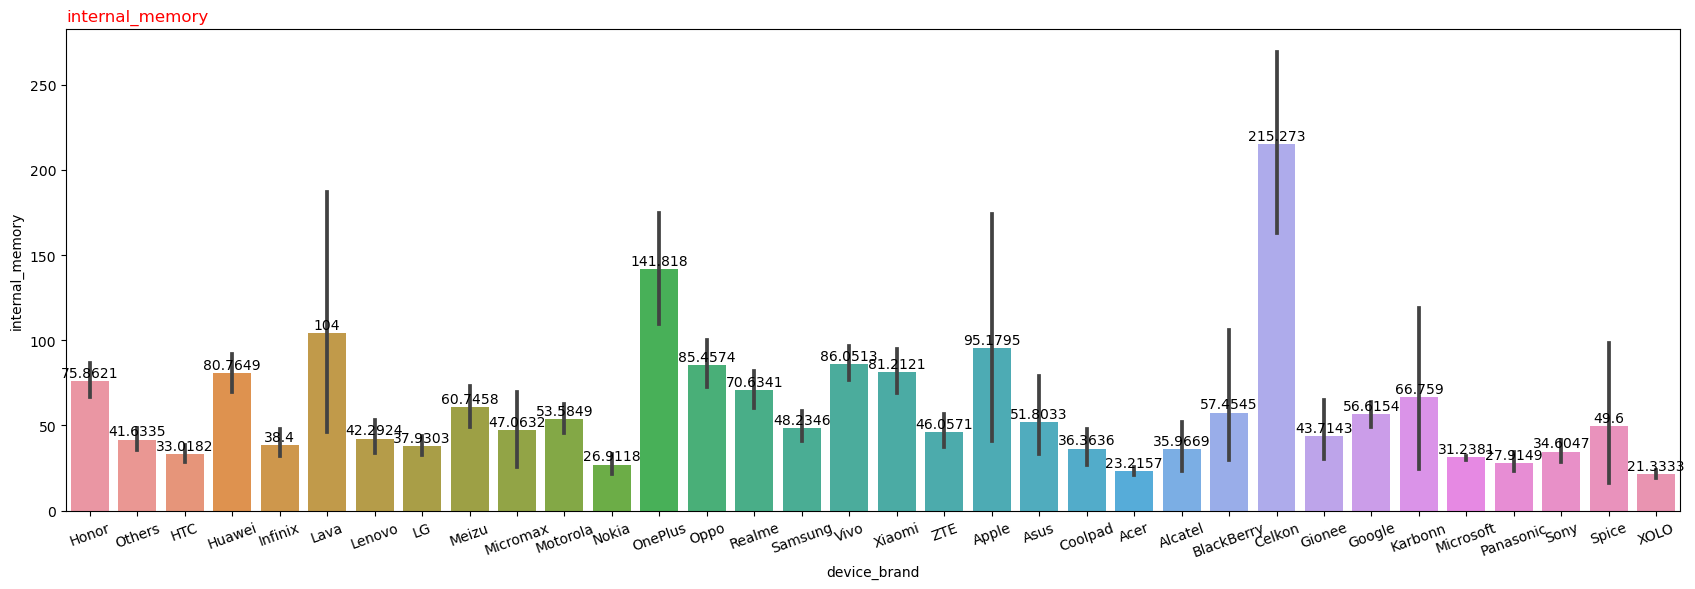

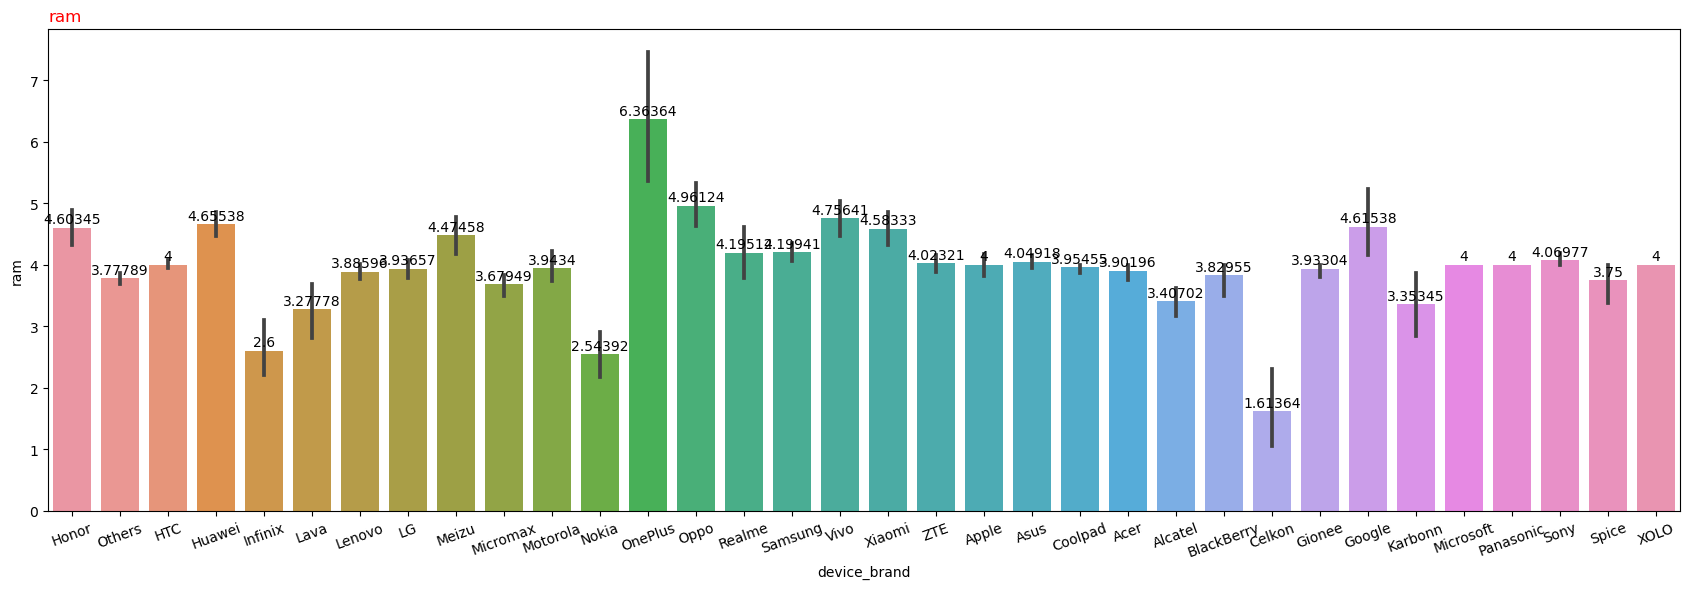

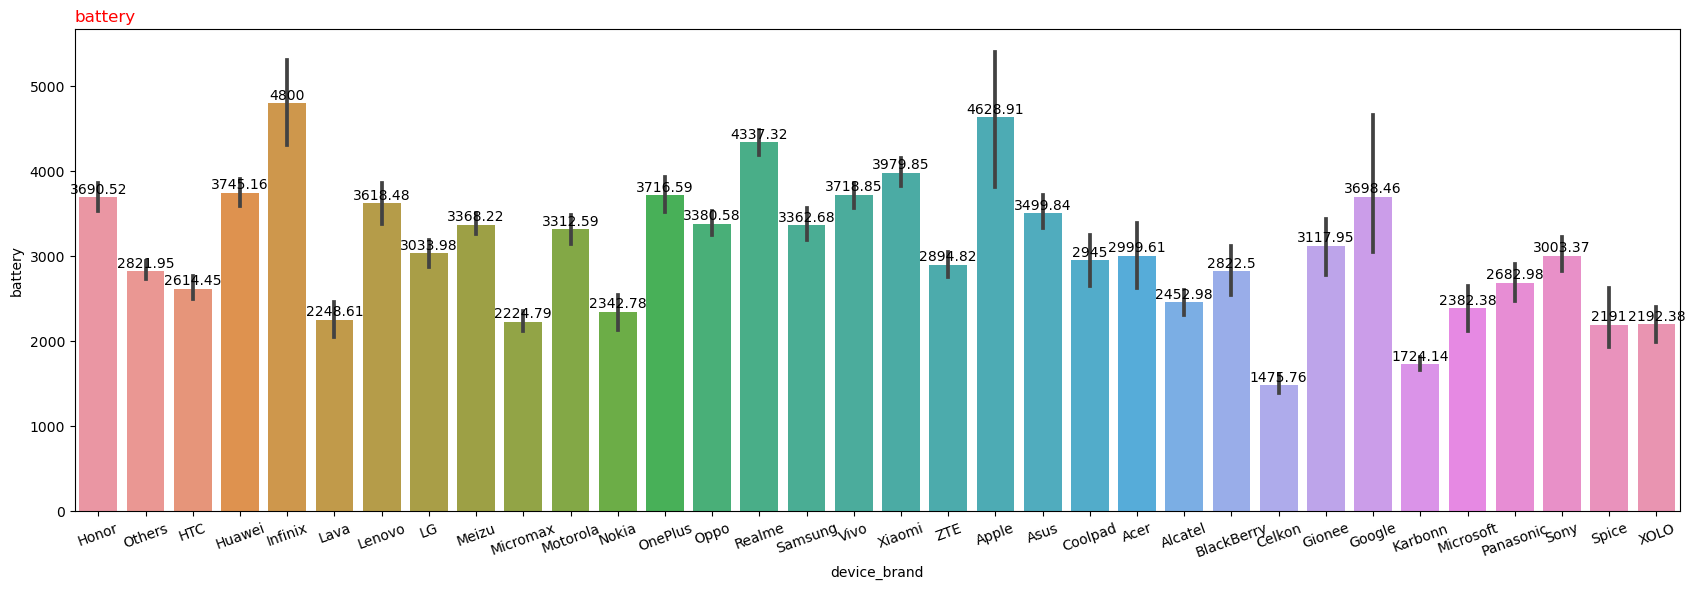

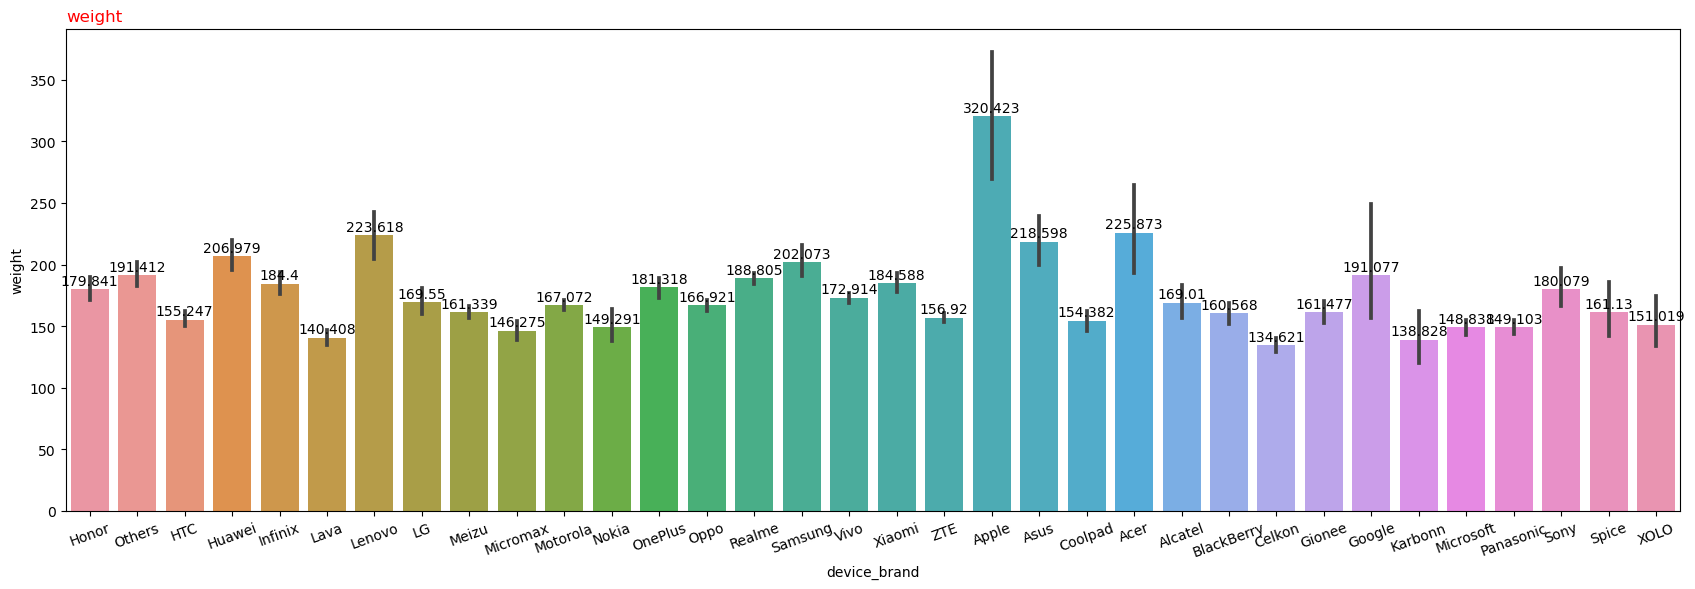

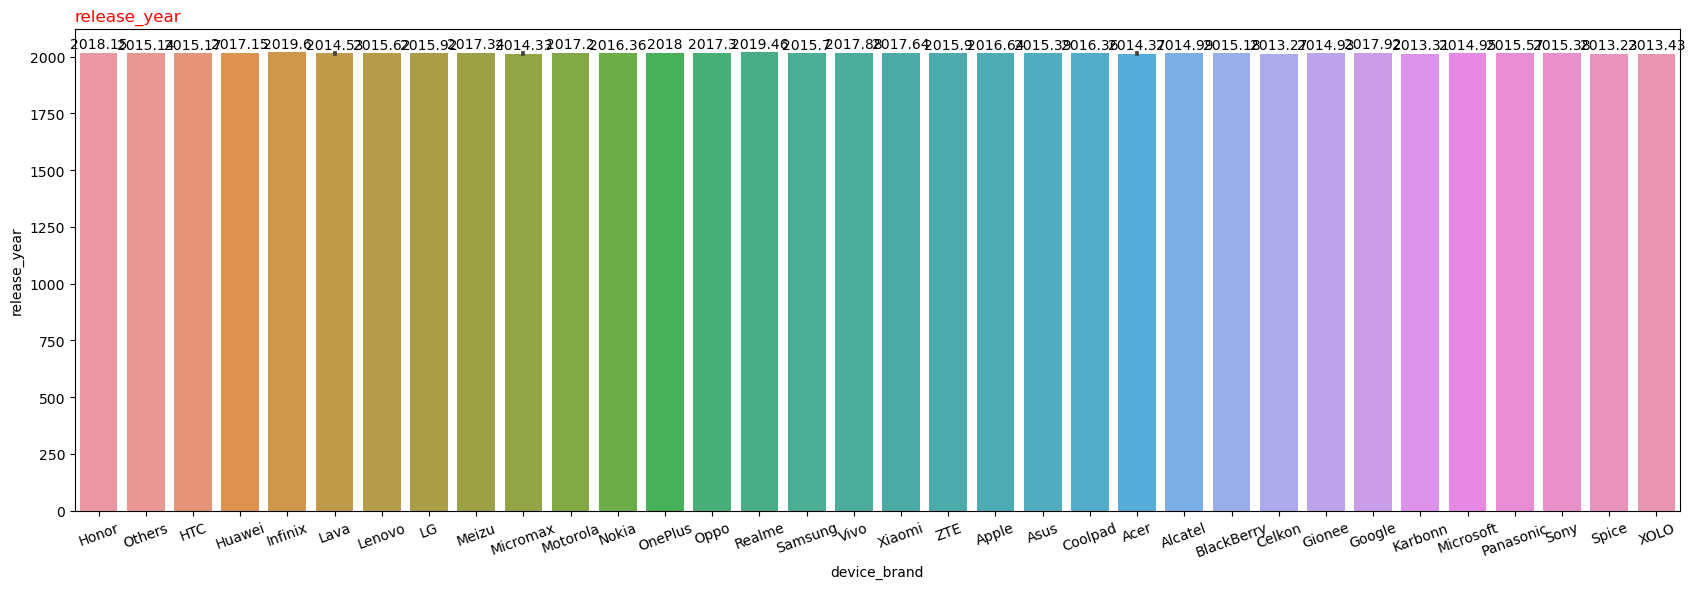

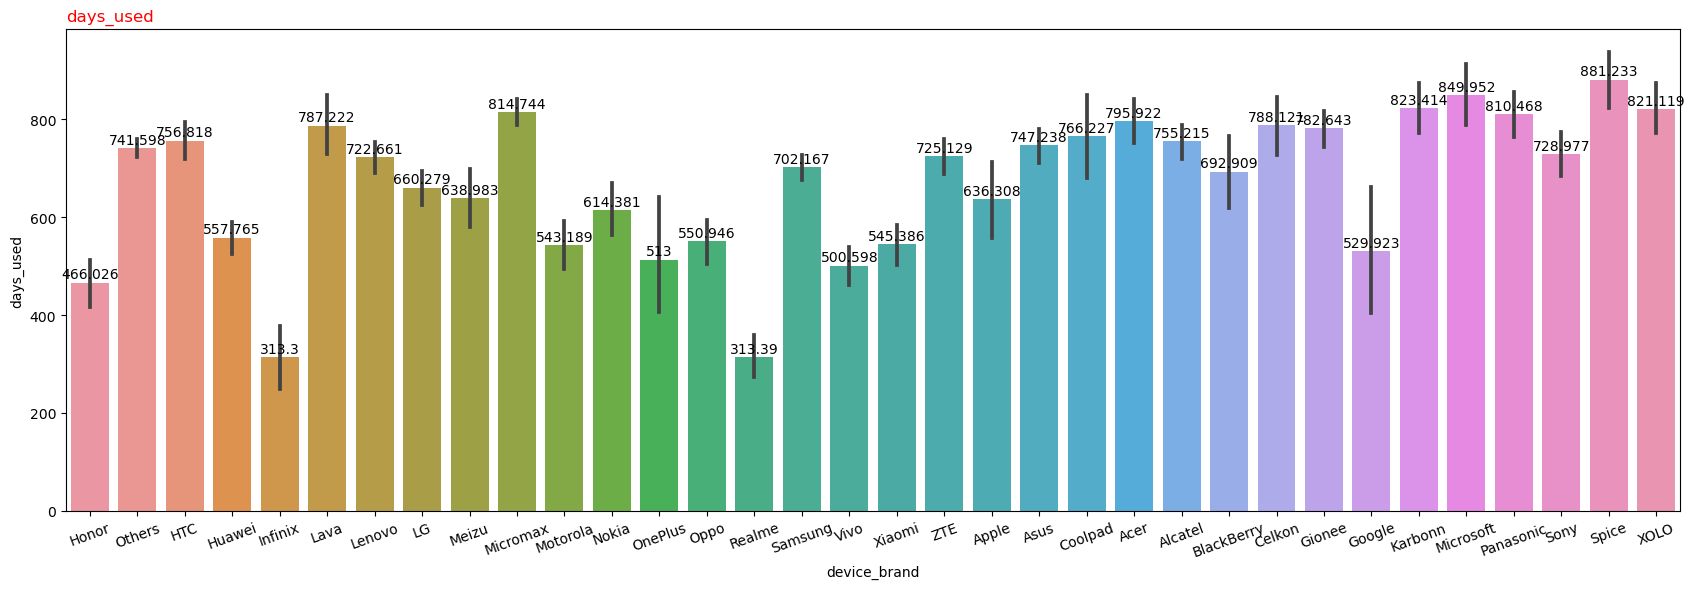

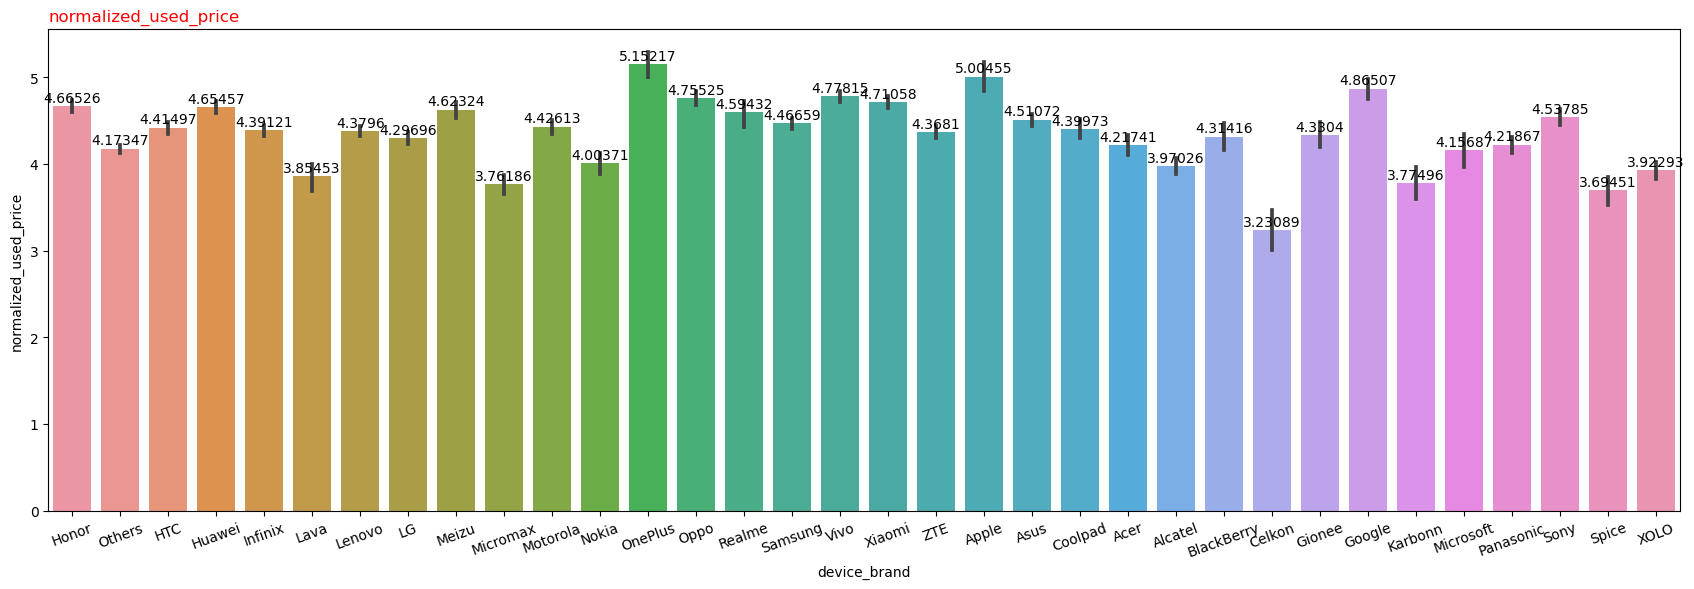

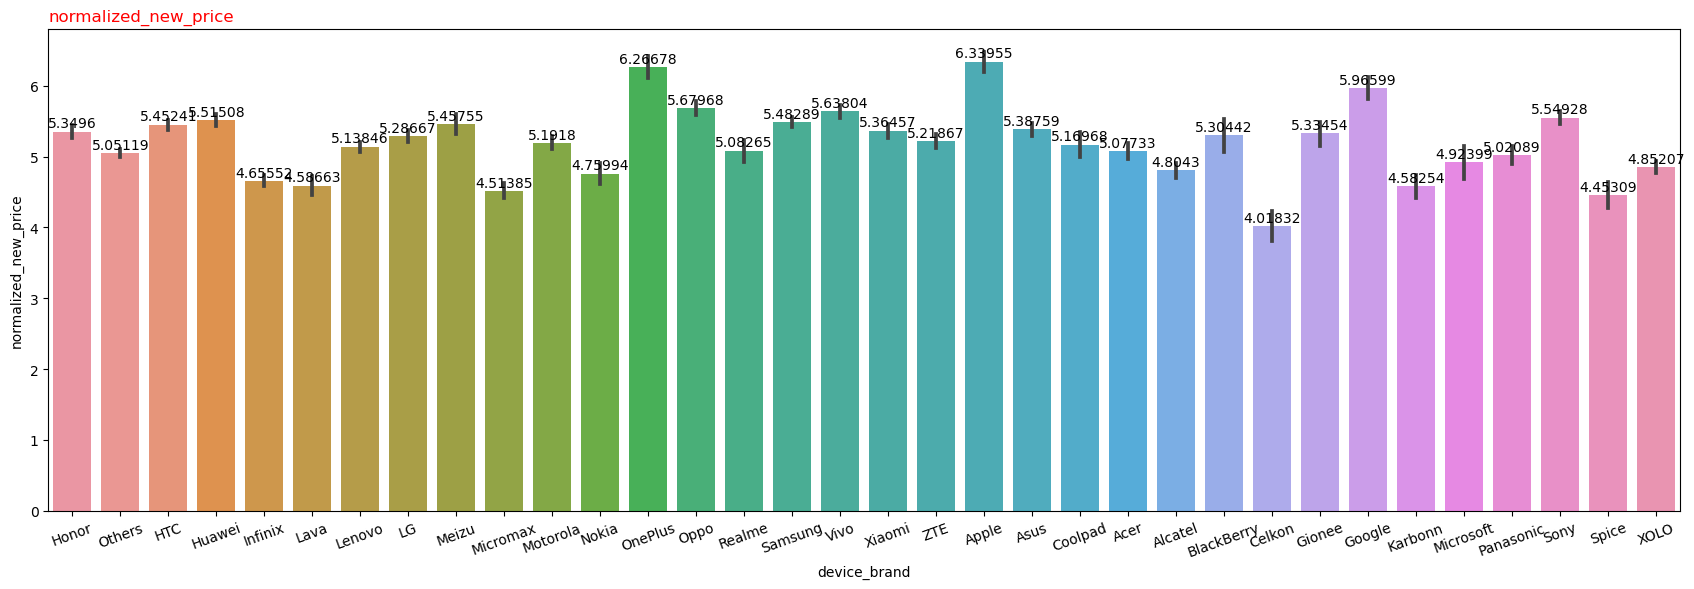

In [16]:
#plotting to see the Device brand and the Device Brand

for i,col in enumerate(df.drop(['device_brand','os','4g','5g'],axis=1)):
    plt.figure(figsize=(17,6),dpi=100)
    fig=sns.barplot(data=df,x='device_brand',y=col)
    plt.tight_layout(pad=2)
    plt.title(col,c='r',loc='left')
    plt.xticks(rotation=20)
    plt.tight_layout()
    
    for container in fig.containers:
        fig.bar_label(container,label_type='edge',padding=1)

**insight:**
    
   Apple phones lead the pack in terms of new phone price values.

As Oneplus phones (in the Android category) have been used for fewer days than Apple phones (in the Apple Category), which have been used for more days before being sold, Oneplus phones have taken the lead even after Oneplus phones have been used for fewer days than Apple devices.
    User used the device, the user ill have bigger chance o sell the fone on hugh price.
    That is if the oneplus phone user stay longer on the days it might depreciate while apple won't depreciate.
    
    Apple has more significance and values. Every other device available on the market is a phone.
Apple devices were in second place in terms of battery life, followed by Android devices with infinix gat backup.
Apple and other devices don't even come close to Android phones in terms of RAM.
Apple smartphones outperform Android devices and all other devices in terms of screen size, but for one of the primary elements Apple exploited to draw attention to its products: screen quality, battery life, and weight (market values).

**MOve down to ML**

In [17]:
df.head()


#let view The data

,device_brand,os,screen_size,4g,5g,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


For ML purpose we have to convert out the boolean columns to numeric column.

In [18]:
#first let copy this data into name

dframe=df.copy()

In [19]:
#let map the name out


dframe['4g']=df['4g'].map({'yes':1,'no':0})
dframe['5g']=df['5g'].map({'yes':1,'no':0})

In [20]:
dframe.head()

,device_brand,os,screen_size,4g,5g,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [21]:
n_df=dframe.select_dtypes('number')

In [22]:
n_df.head()

,screen_size,4g,5g,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,14.50,1,0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,17.30,1,1,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,16.69,1,1,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,25.50,1,1,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,15.32,1,0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


We training without The Devices and os.

In [23]:
n_df.shape

(3432, 12)

we Left with 13 columns and 3432 rows

In [ ]:
#checking out for Outliers in our target varaible

n_df['normalized_used_price'].plot.box()

In [24]:
#creatinf a function to check out for outliers for us


def box_plot_calculation(data):
    data=data.values
    q25,q75=np.percentile(data,25),np.percentile(data,75)
    print('Quantile 25:{} | quantile 75:{}'.format(q25,q75))
    IQR=q75-q25
    print('IQR:{}'.format(IQR))
    cut_off=IQR*1.5
    MIN,MAX=q25-cut_off,q75+cut_off
    print('cut_off:{}'.format(cut_off))
    print('Minimum: {}'.format(MIN))
    print("Maximum: {}".format(MAX))
    outliers=[x for x in data if x < MIN or x > MAX]
    outliers.sort()
    print('Features Outliers: {}'.format(len(outliers)))
    print('Outliers:{}'.format(outliers))

In [25]:
box_plot_calculation(n_df['normalized_used_price'])

Quantile 25:4.037200851 | quantile 75:4.75793412125
IQR:0.7207332702500002
cut_off:1.0810999053750003
Minimum: 2.9561009456249994
Maximum: 5.839034026625001
Features Outliers: 79
Outliers:[1.53686722, 1.572773928, 1.617406082, 2.033397603, 2.05284086, 2.063058062, 2.212660385, 2.23644529, 2.242835089, 2.267993648, 2.315501318, 2.323367632, 2.333114298, 2.335052283, 2.337952237, 2.346601978, 2.351375257, 2.35991016, 2.383242996, 2.386926241, 2.396985768, 2.429217744, 2.460443178, 2.466403178, 2.506341931, 2.519308077, 2.564949357, 2.584751985, 2.621038824, 2.630448955, 2.660259537, 2.667228207, 2.68988623, 2.691243083, 2.709382646, 2.714694744, 2.714694744, 2.715356776, 2.735665368, 2.753023567, 2.779440197, 2.789322921, 2.800325477, 2.822568655, 2.83085763, 2.834389123, 2.842581094, 2.842581094, 2.851284369, 2.853015971, 2.855895328, 2.856470206, 2.85819286, 2.863343086, 2.868466923, 2.877511642, 2.884800713, 2.888147063, 2.889816048, 2.896464272, 2.910174385, 2.911807039, 2.915606229,

In [29]:
lower_range_df=n_df[n_df['normalized_used_price'] >=2.945491057]

In [35]:
new_data=lower_range_df[lower_range_df['normalized_used_price'] <=5.847392078]

In [37]:
new_data.shape

(3355, 12)

<AxesSubplot:>

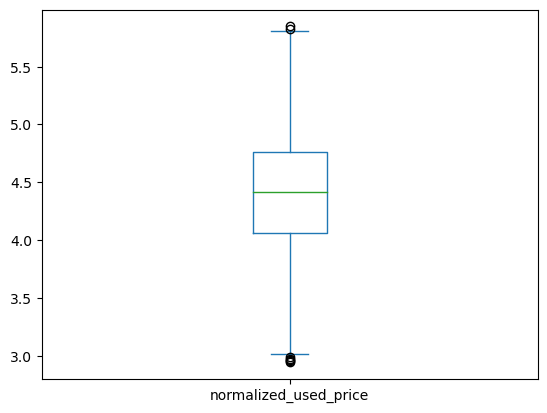

In [38]:
new_data['normalized_used_price'].plot.box()

let train with it and wait for the result if it doesn't give more accuracy we cut all of the outliers out

In [39]:
new_data.head()

,screen_size,4g,5g,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,14.50,1,0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,17.30,1,1,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,16.69,1,1,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,25.50,1,1,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,15.32,1,0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [45]:
new_data.skew()

screen_size              1.222671
4g                      -0.819065
5g                       4.459454
front_camera_mp          1.795269
internal_memory          6.494313
ram                      1.418134
battery                  1.373172
weight                   3.254564
release_year             0.307939
days_used               -0.339247
normalized_used_price   -0.154730
normalized_new_price     0.166399
dtype: float64

The Onces with (-) is saying to us that our Negative skew

In [40]:
#let import the necessary Library for ML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [41]:
X=new_data.drop('normalized_used_price',axis=1)

y=new_data['normalized_used_price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [43]:
model=LinearRegression()

In [44]:
model.fit(X_train,y_train)

LinearRegression()

In [46]:
#checking for the variavle coefficient

model.coef_

array([ 2.18608892e-02,  9.97898686e-02, -5.02948523e-02,  1.69663366e-02,
        1.36404636e-04,  3.86914753e-03,  7.94845902e-06,  6.37873439e-04,
        2.70427001e-02,  6.22040963e-05,  4.44377336e-01])

In [47]:
pd.DataFrame(data=model.coef_,index=X.columns,columns=['Coefficient'])

,Coefficient
screen_size,0.021861
4g,0.099790
5g,-0.050295
front_camera_mp,0.016966
internal_memory,0.000136
ram,0.003869
battery,0.000008
weight,0.000638
release_year,0.027043
days_used,0.000062


The Normalized_new_price has more contribution to the model.

In [60]:
#Importing the Evaluation libraries

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [65]:
#let check for the level of their fittness

test_prediction=model.predict(X_test)

print('Mean Absolute Error: %.2f'%mean_absolute_error(y_test,test_prediction))
print('Mean Square Erroe: %.2f'%mean_squared_error(y_test,test_prediction))
print('Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,test_prediction)))
print('R_Squared:%.2f'% r2_score(y_test,test_prediction))

Mean Absolute Error: 0.19
Mean Square Erroe: 0.06
Root Mean Square Error:0.25
R_Squared:0.78


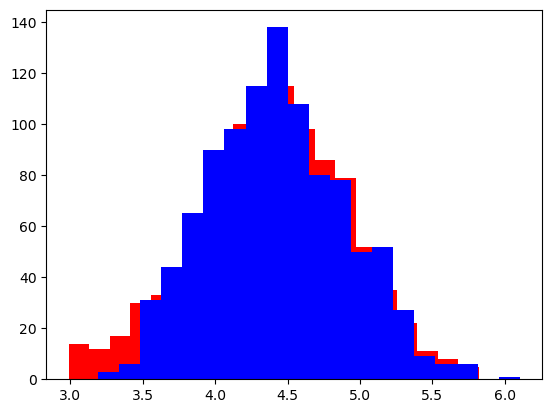

In [73]:
#in all we checking how is this Model as fitt in this model

plt.hist(y_test,bins=20,color='r');
plt.hist(test_prediction,bins=20,color='b');

this Is to Tell you how fit how model is not 100% but at least almost 80%

**We the package with another model**

In [74]:
model_2=RandomForestRegressor()
model_2.fit(X_train,y_train)
test_prdict_2=model_2.predict(X_test)

In [76]:
print('Mean Absolute Error: %.2f'%mean_absolute_error(y_test,test_prdict_2))
print('Mean Square Erroe: %.2f'%mean_squared_error(y_test,test_prdict_2))
print('Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,test_prdict_2)))
print('R_Squared:%.2f'% r2_score(y_test,test_prdict_2))

Mean Absolute Error: 0.19
Mean Square Erroe: 0.06
Root Mean Square Error:0.24
R_Squared:0.79


the fitness increase with 1%
why the errorate decrease with 1%

**let plot out to see the fitness**

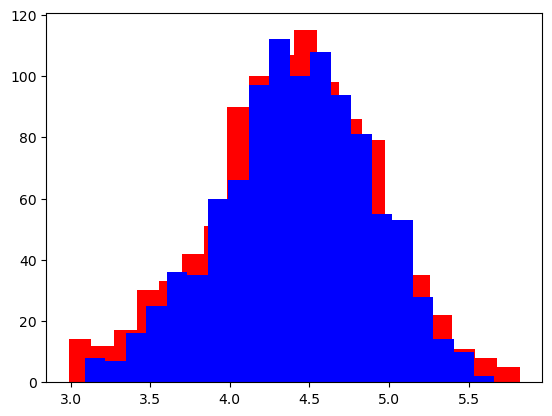

In [79]:
plt.hist(y_test,bins=20,color='r')
plt.hist(test_prdict_2,bins=20,color='b');

Now we can see the fitness building Up

In [80]:
#let used DecisionTreeregressor:

from sklearn.tree import DecisionTreeRegressor

In [81]:
tree=DecisionTreeRegressor()

tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [82]:
test_predict_3=tree.predict(X_test)

print('Mean Absolute Error: %.2f'%mean_absolute_error(y_test,test_predict_3))
print('Mean Square Erroe: %.2f'%mean_squared_error(y_test,test_predict_3))
print('Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,test_predict_3)))
print('R_Squared:%.2f'% r2_score(y_test,test_predict_3))

Mean Absolute Error: 0.25
Mean Square Erroe: 0.10
Root Mean Square Error:0.32
R_Squared:0.64


using DecisionTreeRegression is given us Higher Error rate

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
Encode=LabelEncoder()

In [88]:
dframe['os']=Encode.fit_transform(dframe['os'])

In [90]:
new_data=dframe.select_dtypes('number')

In [93]:
#for the purpose of reading

new_data.head()

,os,screen_size,4g,5g,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,0,14.50,1,0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,0,17.30,1,1,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,0,16.69,1,1,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,0,25.50,1,1,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,0,15.32,1,0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [94]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.30, random_state=101)
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler=StandardScaler()

In [97]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [98]:
model.fit(X_train,y_train)

LinearRegression()

In [100]:
y_predict=model.predict(X_test)

In [101]:
print('Mean Absolute Error: %.2f'%mean_absolute_error(y_test,y_predict))
print('Mean Square Erroe: %.2f'%mean_squared_error(y_test,y_predict))
print('Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,y_predict)))
print('R_Squared:%.2f'% r2_score(y_test,y_predict))

Mean Absolute Error: 0.19
Mean Square Erroe: 0.06
Root Mean Square Error:0.24
R_Squared:0.79


Even after Scaling it down The Model refuse to improve

In [102]:
#Let used Randomforest

tree=RandomForestRegressor()
tree.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
y_predictt=tree.predict(X_test)

In [105]:
print('Mean Absolute Error: %.2f'%mean_absolute_error(y_test,y_predictt))
print('Mean Square Erroe: %.2f'%mean_squared_error(y_test,y_predictt))
print('Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,y_predictt)))
print('R_Squared:%.2f'% r2_score(y_test,y_predictt))

Mean Absolute Error: 0.14
Mean Square Erroe: 0.04
Root Mean Square Error:0.19
R_Squared:0.86


O Ma Gosh:

Our Model improve with to 7%

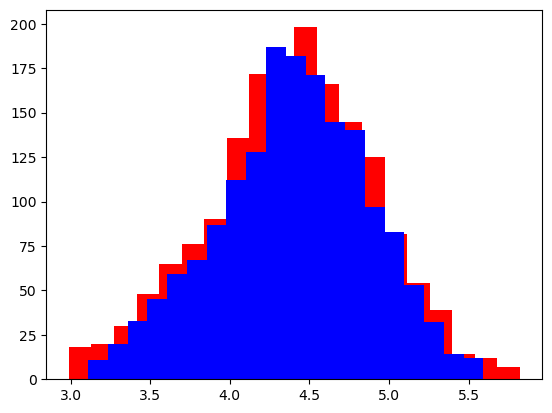

In [108]:
plt.hist(y_test,bins=20,color='r')
plt.hist(y_predictt,bins=20,color='b');

#is fitting in little by little

Observation:
    
    using LinearRegression is given us give us Low Accuracy 
    but Using Randomforest is improving our Accuracy.

Okay right Naw, We are going to be let cutting down all Outliers making sure

In [119]:
outlier_1=new_data[new_data['normalized_used_price']<=5.747392078]

In [120]:
out_lier_2=outlier_1[outlier_1['normalized_used_price']>=3.045491057]

<AxesSubplot:>

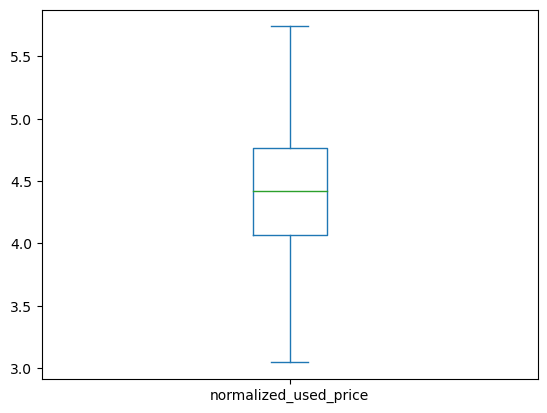

In [121]:
out_lier_2['normalized_used_price'].plot.box()

we have Taken out the outliers, from The Target columns now let carry out our linearRegression

In [122]:
X=out_lier_2.drop(['normalized_used_price'],axis=1)

y=out_lier_2['normalized_used_price']

In [123]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.30, random_state=101)
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [124]:
model_2.fit(X_train,y_train)
y_pred=model_2.predict(X_test)

In [125]:
print('Mean Absolute Error: %.2f'%mean_absolute_error(y_test,y_pred))
print('Mean Square Erroe: %.2f'%mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,y_pred)))
print('R_Squared:%.2f'% r2_score(y_test,y_pred))

Mean Absolute Error: 0.13
Mean Square Erroe: 0.03
Root Mean Square Error:0.18
R_Squared:0.87


The modern Increase with 1%, let scale it

In [126]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [127]:
#now let refit

model_2.fit(X_train,y_train)
predictt=model_2.predict(X_test)

In [128]:
print('Mean Absolute Error: %.2f'%mean_absolute_error(y_test,predictt))
print('Mean Square Erroe: %.2f'%mean_squared_error(y_test,predictt))
print('Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,predictt)))
print('R_Squared:%.2f'% r2_score(y_test,predictt))

Mean Absolute Error: 0.13
Mean Square Erroe: 0.03
Root Mean Square Error:0.18
R_Squared:0.87


hAving Taking Out All of the Outliers in our Targget varaible our model increase with Percent.

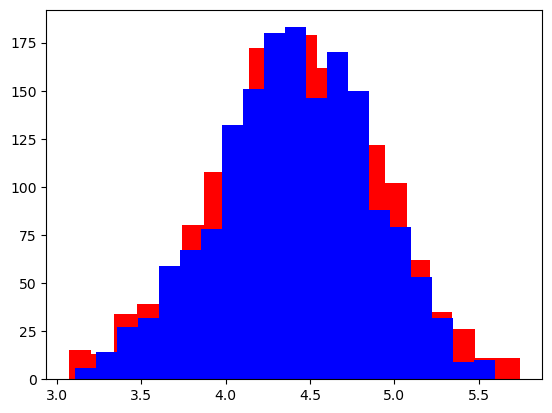

In [131]:
plt.hist(x=y_test,bins=20,color='red')
plt.hist(x=predictt,bins=20,color='blue');

this level is to tell you That The level of Our model is try to fittin our model